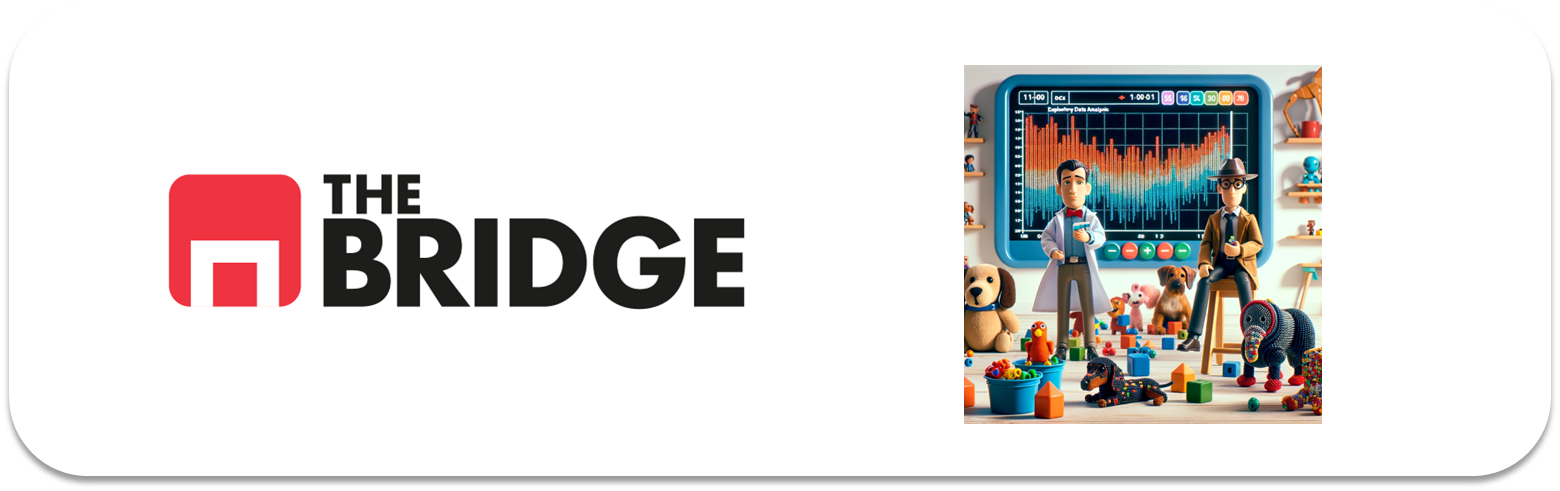

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import *



## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
# Ruta del archivo CSV
ruta = "./data/titanic.csv"

# Carga del dataset en un DataFrame
titanic_df = pd.read_csv(ruta)

# Muestra las primeras filas del DataFrame para verificar que se cargó correctamente
titanic_df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
# Crear una copia del DataFrame original
titanic_copy = titanic_df.copy()

# Eliminar las columnas especificadas
columnas_a_eliminar = ["deck", "survived", "pclass", "embarked"]
titanic_copy.drop(columnas_a_eliminar, axis=1, inplace=True)

# Mostrar las primeras filas del DataFrame limpio
titanic_copy.head()


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
# Sumar las columnas "parch" y "sibsp"
titanic_copy['family_members'] = titanic_copy['parch'] + titanic_copy['sibsp']

# Eliminar las columnas "parch" y "sibsp"
titanic_copy.drop(['parch', 'sibsp'], axis=1, inplace=True)

# Mostrar las primeras filas del DataFrame actualizado
titanic_copy.head()


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
# Calcula la moda de la columna "embark_town"
moda_embark_town = titanic_copy['embark_town'].mode()[0]

# Imputa la moda a los valores nulos
titanic_copy['embark_town'].fillna(moda_embark_town, inplace=True)

# Muestra la cantidad de valores nulos después de la imputación
print("Cantidad de valores nulos en embark_town después de la imputación:", titanic_copy['embark_town'].isnull().sum())


Cantidad de valores nulos en embark_town después de la imputación: 0


C:\Users\ferna\AppData\Local\Temp\ipykernel_4856\2514936405.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_copy['embark_town'].fillna(moda_embark_town, inplace=True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
# Para evitar el warning recibido, mostramos alternativa
# Imputa la moda a los valores nulos de embark_town
titanic_copy['embark_town'] = titanic_copy['embark_town'].fillna(moda_embark_town)

# Muestra la cantidad de valores nulos después de la imputación
print("Cantidad de valores nulos en embark_town después de la imputación:", titanic_copy['embark_town'].isnull().sum())


Cantidad de valores nulos en embark_town después de la imputación: 0


In [7]:
# Calcula las medias de edad para cada grupo ('male', 'female', 'child')
medias_por_grupo = titanic_copy.groupby('who')['age'].mean()
print(medias_por_grupo)



who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64


In [8]:
# Imputa la media correspondiente a cada grupo a los valores faltantes
titanic_copy['age'] = titanic_copy.apply(
    lambda row: medias_por_grupo[row['who']] if pd.isnull(row['age']) else row['age'],
    axis=1
)

# Muestra la cantidad de valores nulos después de la imputación
print("Cantidad de valores nulos en age después de la imputación:", titanic_copy['age'].isnull().sum())

Cantidad de valores nulos en age después de la imputación: 0


In [9]:
titanic_copy.head(10)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.000000,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.000000,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.000000,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.000000,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.000000,8.0500,Third,man,True,Southampton,no,True,0
5,male,33.173123,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.000000,51.8625,First,man,True,Southampton,no,True,0
7,male,2.000000,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.000000,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.000000,30.0708,Second,child,False,Cherbourg,yes,False,1


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [10]:
# Filtrar el DataFrame para incluir solo las filas donde el valor original de "age" es igual a la media 6.369518
sustituidos_df = titanic_copy[titanic_copy['age'] == 6.369518]

# Mostrar las filas donde se ha realizado una sustitución utilizando la media
print(sustituidos_df)



Empty DataFrame
Columns: [sex, age, fare, class, who, adult_male, embark_town, alive, alone, family_members]
Index: []


1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

In [11]:
# Crear una tabla de contingencia para sexo vs. supervivencia
tabla_sexo_alive = pd.crosstab(titanic_copy['sex'], titanic_copy['alive'])

# Mostrar la tabla de contingencia
tabla_sexo_alive


alive,no,yes
sex,,
female,81,233
male,468,109


In [12]:
# Calcular las proporciones de supervivencia por sexo
proporcion_sexo_alive = tabla_sexo_alive.div(tabla_sexo_alive.sum(axis=1), axis=0)

# Mostrar las proporciones de supervivencia por sexo
proporcion_sexo_alive


alive,no,yes
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [13]:
from scipy.stats import chi2_contingency

# Realizar el test de independencia chi-cuadrado para sexo vs. supervivencia
chi2, p_valor, _, _ = chi2_contingency(tabla_sexo_alive)

# Mostrar el p-valor.Un p-valor bajo (generalmente menos de 0.05) indicaría que hay una relación estadísticamente significativa entre el sexo y la supervivencia.
print("P-valor para la relación entre sexo y supervivencia:", p_valor)


P-valor para la relación entre sexo y supervivencia: 1.1973570627755645e-58


El p-valor obtenido para la relación entre la variable "sexo" y la supervivencia es extremadamente bajo, aproximadamente 2.2227620817798914e-62. Este valor tan bajo indica que hay una relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic.

In [14]:
# Crear una tabla de contingencia para who vs. supervivencia
tabla_who_alive = pd.crosstab(titanic_copy['who'], titanic_copy['alive'])

# Mostrar la tabla de contingencia
tabla_who_alive

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [15]:
# Calcular las proporciones de supervivencia por who
proporcion_who_alive = tabla_who_alive.div(tabla_who_alive.sum(axis=1), axis=0)

# Mostrar las proporciones de supervivencia por sexo
proporcion_who_alive

alive,no,yes
who,,
child,0.409639,0.590361
man,0.836127,0.163873
woman,0.243542,0.756458


El p-valor obtenido para la relación entre la variable "who" (que distingue entre hombres, mujeres y niños) y la supervivencia es extremadamente bajo, aproximadamente 2.2227620817798914e-62. Este valor tan bajo indica que hay una relación estadísticamente significativa entre el género y la supervivencia en el Titanic. En otras palabras, la variable "who" (que es una proxy del género) está asociada de manera significativa con las probabilidades de supervivencia en el naufragio del Titanic.

In [16]:
# Realizar el test de independencia chi-cuadrado para who vs. supervivencia
chi2, p_valor, _, _ = chi2_contingency(tabla_who_alive)

# Mostrar el p-valor.Un p-valor bajo (generalmente menos de 0.05) indicaría que hay una relación estadísticamente significativa entre el who y la supervivencia.
print("P-valor para la relación entre who y supervivencia:", p_valor)

P-valor para la relación entre who y supervivencia: 2.2227620817798914e-62


In [17]:
# Definir una nueva columna "age_group" que identifica a cada pasajero como adulto o niño
titanic_copy['age_group'] = titanic_copy['who'].apply(lambda x: 'adult' if x in ['man', 'woman'] else 'child')

# Crear una tabla de contingencia para la nueva categoría "age_group" vs. supervivencia
tabla_age_group_alive = pd.crosstab(titanic_copy['age_group'], titanic_copy['alive'])

# Mostrar la tabla de contingencia
tabla_age_group_alive




alive,no,yes
age_group,,
adult,515,293
child,34,49


In [18]:
# Calcular las proporciones de supervivencia por categoría "age_group"
proporcion_age_group_alive = tabla_age_group_alive.div(tabla_age_group_alive.sum(axis=1), axis=0)

# Mostrar las proporciones de supervivencia por categoría "age_group"
print(proporcion_age_group_alive)

# Realizar el test de independencia chi-cuadrado para la categoría "age_group" vs. supervivencia
chi2, p_valor, _, _ = chi2_contingency(tabla_age_group_alive)

# Mostrar el p-valor
print("P-valor para la relación entre ser adulto o niño y supervivencia:", p_valor)

alive            no       yes
age_group                    
adult      0.637376  0.362624
child      0.409639  0.590361
P-valor para la relación entre ser adulto o niño y supervivencia: 8.005497211300105e-05


El p-valor obtenido del test de independencia chi-cuadrado es 8.005497211300105e-05, lo que indica que es extremadamente bajo. Esto sugiere que hay una relación estadísticamente significativa entre ser adulto o niño y la supervivencia en el Titanic.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?



In [19]:
# Crear una tabla de contingencia para la clase vs. supervivencia
tabla_clase_alive = pd.crosstab(titanic_copy['class'], titanic_copy['alive'])

# Mostrar la tabla de contingencia
tabla_clase_alive


alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [20]:
# Calcular las proporciones de supervivencia por clase
proporcion_clase_alive = tabla_clase_alive.div(tabla_clase_alive.sum(axis=1), axis=0)

# Mostrar las proporciones de supervivencia por clase
proporcion_clase_alive


alive,no,yes
class,,
First,0.370370,0.629630
Second,0.527174,0.472826
Third,0.757637,0.242363


In [21]:
# Calcular las proporciones de supervivencia por clase en porcentaje
proporcion_clase_alive_porcentaje = (proporcion_clase_alive * 100).round (2)

# Mostrar las proporciones de supervivencia por clase en porcentaje
print(proporcion_clase_alive_porcentaje)


alive      no    yes
class               
First   37.04  62.96
Second  52.72  47.28
Third   75.76  24.24


In [22]:
# Realizar el test de independencia chi-cuadrado para la clase vs. supervivencia
chi2, p_valor, _, _ = chi2_contingency(tabla_clase_alive)

# Mostrar el p-valor
print("P-valor para la relación entre la clase y la supervivencia:", p_valor)


P-valor para la relación entre la clase y la supervivencia: 4.549251711298793e-23


La clase en la que se viajaba está asociada de manera significativa con las probabilidades de supervivencia.

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

In [23]:
# Crear una tabla de contingencia para la ciudad de embarque vs. supervivencia
tabla_ciudad_alive = pd.crosstab(titanic_copy['embark_town'], titanic_copy['alive'])


tabla_ciudad_alive


alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [24]:
# Calcular las proporciones de supervivencia por ciudad de embarque
proporcion_ciudad_alive = tabla_ciudad_alive.div(tabla_ciudad_alive.sum(axis=1), axis=0)

# Mostrar las proporciones de supervivencia por ciudad de embarque
print(proporcion_ciudad_alive)



alive              no       yes
embark_town                    
Cherbourg    0.446429  0.553571
Queenstown   0.610390  0.389610
Southampton  0.660991  0.339009


In [25]:
# Realizar el test de independencia chi-cuadrado para la ciudad de embarque vs. supervivencia
chi2, p_valor, _, _ = chi2_contingency(tabla_ciudad_alive)

# Mostrar el p-valor
print("P-valor para la relación entre la ciudad de embarque y la supervivencia:", p_valor)


P-valor para la relación entre la ciudad de embarque y la supervivencia: 2.3008626481449577e-06


Este valor tan bajo sugiere que hay una relación estadísticamente significativa entre la ciudad de embarque y las probabilidades de supervivencia en el Titanic. 

In [26]:
# Crear una tabla de contingencia para class y embark_town
tabla_class_embark = pd.crosstab(titanic_copy['class'], titanic_copy['embark_town'])

# Mostrar la tabla de contingencia
tabla_class_embark


embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,129
Second,17,3,164
Third,66,72,353


In [27]:
# Crear una tabla de contingencia para class, embark_town y alive
tabla_class_embark_alive = pd.crosstab([titanic_copy['class'], titanic_copy['embark_town']], titanic_copy['alive'], margins=True)

# Mostrar la tabla de contingencia
tabla_class_embark_alive



alive                no  yes  All
class  embark_town               
First  Cherbourg     26   59   85
       Queenstown     1    1    2
       Southampton   53   76  129
Second Cherbourg      8    9   17
       Queenstown     1    2    3
       Southampton   88   76  164
Third  Cherbourg     41   25   66
       Queenstown    45   27   72
       Southampton  286   67  353
All                 549  342  891

In [28]:
# Calcular la probabilidad de supervivencia por combinación de clase y ciudad de embarque
probabilidad_survival_class_embark = ((tabla_class_embark_alive['yes'] / tabla_class_embark_alive['All'])*100).round(2)

# Mostrar la probabilidad de supervivencia por combinación de clase y ciudad de embarque
print(probabilidad_survival_class_embark)


class   embark_town
First   Cherbourg      69.41
        Queenstown     50.00
        Southampton    58.91
Second  Cherbourg      52.94
        Queenstown     66.67
        Southampton    46.34
Third   Cherbourg      37.88
        Queenstown     37.50
        Southampton    18.98
All                    38.38
dtype: float64


In [29]:
# Realizar el test de independencia chi-cuadrado para class, embark_town y alive
chi2, p_valor, _, _ = chi2_contingency(tabla_class_embark_alive)

# Mostrar el p-valor
print("P-valor para la relación entre la clase, ciudad de embarque y supervivencia:", p_valor)


P-valor para la relación entre la clase, ciudad de embarque y supervivencia: 2.8866214887434404e-17


Estas variables no son independientes entre sí, y la probabilidad de supervivencia varía significativamente según la combinación de clase y ciudad de embarque.

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

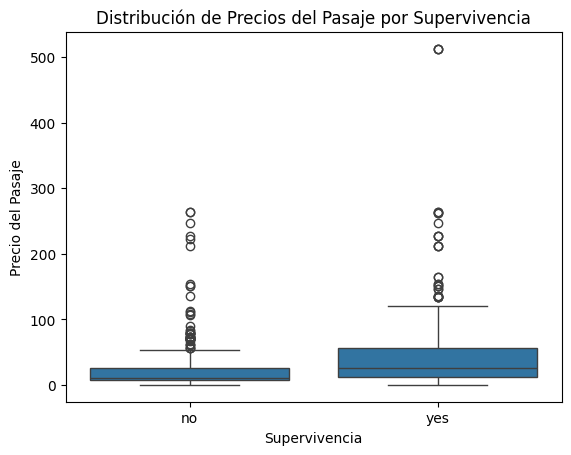

P-valor para la diferencia en los precios del pasaje entre sobrevivientes y fallecidos: 6.120189341924198e-15
Coeficiente de correlación entre el precio del pasaje y la supervivencia/fallecimiento: 0.2573065223849623


In [30]:
# Visualización de datos: Diagrama de caja para los precios del pasaje según la supervivencia
sns.boxplot(x='alive', y='fare', data=titanic_copy)
plt.xlabel('Supervivencia')
plt.ylabel('Precio del Pasaje')
plt.title('Distribución de Precios del Pasaje por Supervivencia')
plt.show()

# Prueba de hipótesis: Prueba t de Student para comparar los precios del pasaje entre los que sobrevivieron y los que fallecieron
from scipy.stats import ttest_ind

sobrevivientes = titanic_copy[titanic_copy['alive'] == 'yes']['fare']
fallecidos = titanic_copy[titanic_copy['alive'] == 'no']['fare']
t_stat, p_valor = ttest_ind(sobrevivientes, fallecidos)
print("P-valor para la diferencia en los precios del pasaje entre sobrevivientes y fallecidos:", p_valor)

# Análisis de correlación: Coeficiente de correlación entre el precio del pasaje y la supervivencia/fallecimiento
correlacion = titanic_copy['fare'].corr(titanic_copy['alive'].map({'yes': 1, 'no': 0}))
print("Coeficiente de correlación entre el precio del pasaje y la supervivencia/fallecimiento:", correlacion)


Este valor tan bajo indica que existe una diferencia significativa en los precios del pasaje entre los dos grupos.

El coeficiente de correlación entre el precio del pasaje y la supervivencia/fallecimiento sugiere una correlación positiva débil entre estas dos variables. En otras palabras, existe una leve tendencia de que los pasajeros que pagaron precios más altos del pasaje tengan mayores probabilidades de sobrevivir, y viceversa. Sin embargo, la correlación no es muy fuerte, lo que indica que otros factores también pueden estar influyendo en la supervivencia de los pasajeros.

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

Errores en los datos: Es posible que algunos pasajeros no hayan tenido un registro adecuado del precio de su pasaje.

Tarifas de cortesía: En algunos casos, los pasajeros pueden haber recibido tarifas de cortesía, ya sea por motivos comerciales (por ejemplo, viajes de negocios) o por razones personales (como viajar con un miembro de la tripulación).

Inclusión en el grupo de tripulación: Algunos pasajeros podrían haber sido miembros de la tripulación o personal de servicio del barco y, por lo tanto, no habrían pagado por su pasaje, aunque en este caso sería esperable más valores sin precio.

"De las 2.300 totales en el Titanic, 1.534 eran pasajeros, a ello se suman las personas de la tripulación con un total de 766.

Del grupo de 766 personas que pertenecían a la tripulación, fallecieron 600 personas aproximadamente. Haciendo un total de 1.523 almas desaparecidas. Finalmente sobrevivieron un total de 777 personas entre pasajeros y tripulantes haciendo un porcentaje de 33,8%. Las pérdidas humanas en porcentaje, es de 66,2%. Se pudieron rescatar un total de 306 cuerpos del agua."
fuente:http://www.revistasbolivianas.ciencia.bo/scielo.php?script=sci_arttext&pid=S9876-67892011000100012&lng=pt&nrm=iso#:~:text=De%20las%202.300%20personas%20nombradas,total%20de%201.523%20almas%20desaparecidas.

In [31]:
# Encontrar la persona que pagó el pasaje más caro
pasajero_mas_caro = titanic_copy.loc[titanic_copy['fare'].idxmax()]

print("De la persona que pagó más dinero por su pasaje sabemos:")
print(pasajero_mas_caro)


De la persona que pagó más dinero por su pasaje sabemos:
sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
age_group             adult
Name: 258, dtype: object


Se salvo.

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.


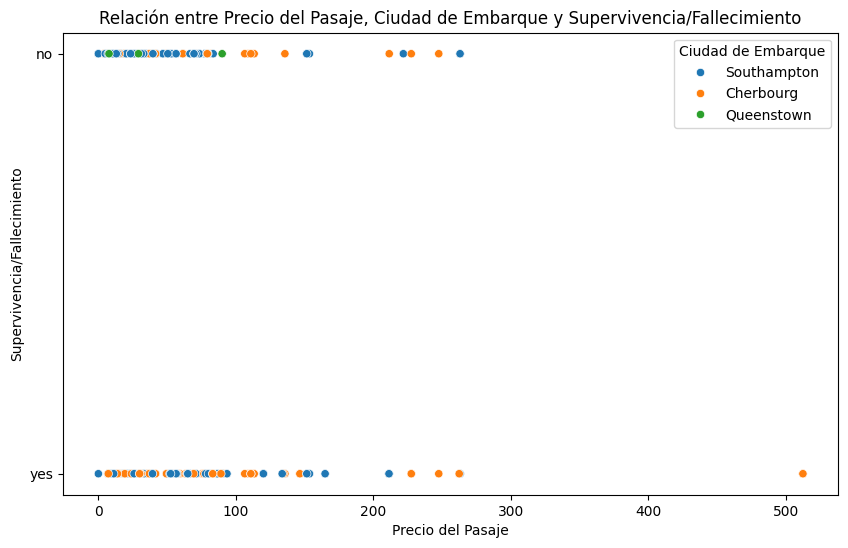

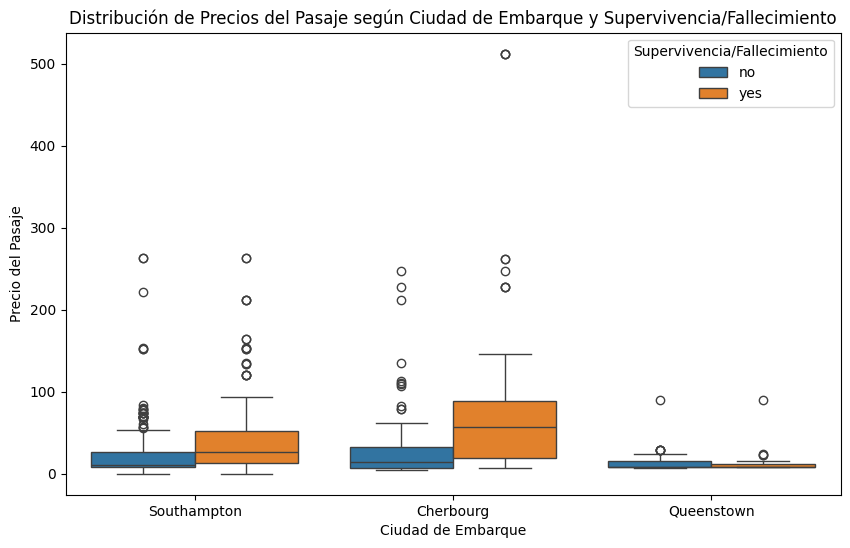

In [32]:
# Diagrama de dispersión para el precio del pasaje y la supervivencia/fallecimiento, con colores según la ciudad de embarque
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare', y='alive', hue='embark_town', data=titanic_copy)
plt.xlabel('Precio del Pasaje')
plt.ylabel('Supervivencia/Fallecimiento')
plt.title('Relación entre Precio del Pasaje, Ciudad de Embarque y Supervivencia/Fallecimiento')
plt.legend(title='Ciudad de Embarque')
plt.show()

# Diagramas de caja para el precio del pasaje según la ciudad de embarque, separando por supervivencia/fallecimiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='embark_town', y='fare', hue='alive', data=titanic_copy)
plt.xlabel('Ciudad de Embarque')
plt.ylabel('Precio del Pasaje')
plt.title('Distribución de Precios del Pasaje según Ciudad de Embarque y Supervivencia/Fallecimiento')
plt.legend(title='Supervivencia/Fallecimiento')
plt.show()


7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?



In [33]:
# Crear una tabla de contingencia para class y age_group vs. alive
tabla_class_age_alive = pd.crosstab([titanic_copy['class'], titanic_copy['age_group']], titanic_copy['alive'])

# Mostrar la tabla de contingencia
tabla_class_age_alive




alive              no  yes
class  age_group          
First  adult       79  131
       child        1    5
Second adult       97   68
       child        0   19
Third  adult      339   94
       child       33   25

In [34]:
# Calcular las frecuencias absolutas de supervivencia y fallecimiento por grupo
frecuencia_absoluta = tabla_class_age_alive.sum(axis=1)
frecuencia_absoluta_sobrevivientes = tabla_class_age_alive['yes']
frecuencia_absoluta_fallecidos = tabla_class_age_alive['no']

# Calcular las frecuencias relativas de supervivencia y fallecimiento por grupo
frecuencia_relativa_sobrevivientes = frecuencia_absoluta_sobrevivientes / frecuencia_absoluta
frecuencia_relativa_fallecidos = frecuencia_absoluta_fallecidos / frecuencia_absoluta

# Mostrar las frecuencias relativas de supervivencia y fallecimiento por grupo
print("Frecuencia relativa de sobrevivientes por grupo:")
print(frecuencia_relativa_sobrevivientes)

print("Frecuencia relativa de fallecidos por grupo:")
print(frecuencia_relativa_fallecidos)

Frecuencia relativa de sobrevivientes por grupo:
class   age_group
First   adult        0.623810
        child        0.833333
Second  adult        0.412121
        child        1.000000
Third   adult        0.217090
        child        0.431034
dtype: float64
Frecuencia relativa de fallecidos por grupo:
class   age_group
First   adult        0.376190
        child        0.166667
Second  adult        0.587879
        child        0.000000
Third   adult        0.782910
        child        0.568966
dtype: float64


8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

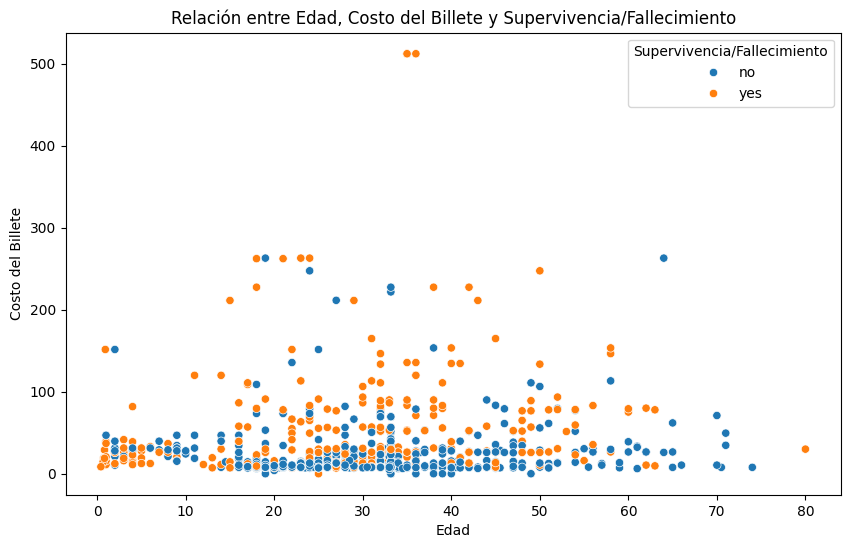

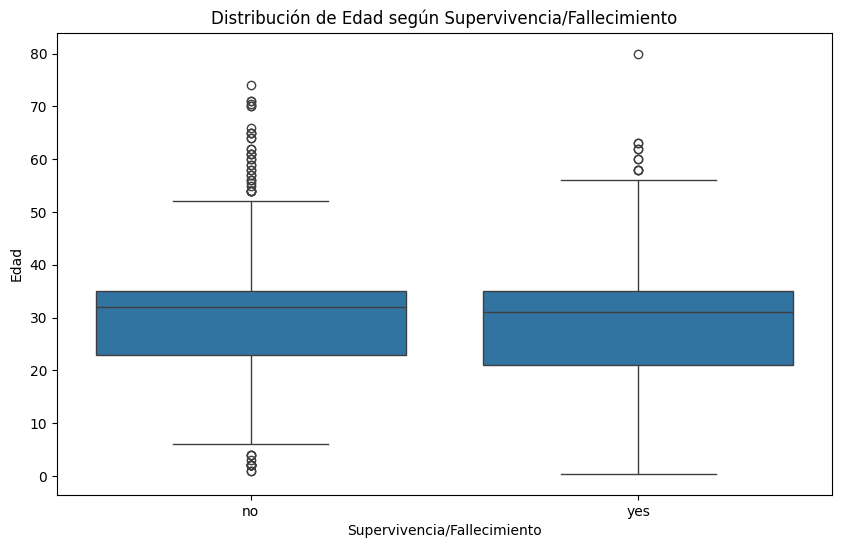

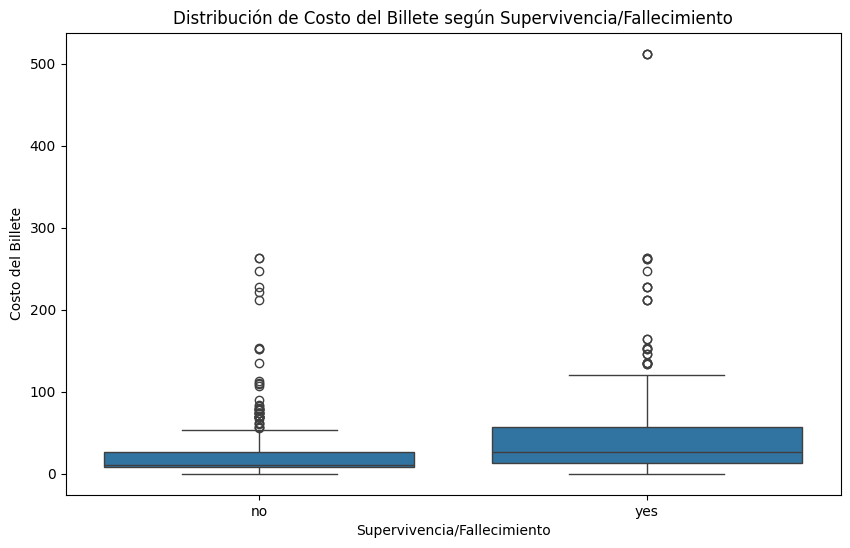

In [35]:
# Diagrama de dispersión para edad y costo del billete, con colores según la supervivencia/fallecimiento
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', hue='alive', data=titanic_copy)
plt.xlabel('Edad')
plt.ylabel('Costo del Billete')
plt.title('Relación entre Edad, Costo del Billete y Supervivencia/Fallecimiento')
plt.legend(title='Supervivencia/Fallecimiento')
plt.show()

# Diagramas de caja para edad y costo del billete según la supervivencia/fallecimiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='alive', y='age', data=titanic_copy)
plt.xlabel('Supervivencia/Fallecimiento')
plt.ylabel('Edad')
plt.title('Distribución de Edad según Supervivencia/Fallecimiento')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='alive', y='fare', data=titanic_copy)
plt.xlabel('Supervivencia/Fallecimiento')
plt.ylabel('Costo del Billete')
plt.title('Distribución de Costo del Billete según Supervivencia/Fallecimiento')
plt.show()


In [36]:
# Estadísticas descriptivas para la edad y el costo del billete según la supervivencia/fallecimiento
estadisticas_sobrevivientes = titanic_copy[titanic_copy['alive'] == 'yes'][['age', 'fare']].describe()
estadisticas_fallecidos = titanic_copy[titanic_copy['alive'] == 'no'][['age', 'fare']].describe()

# Mostrar las estadísticas descriptivas
print("Estadísticas descriptivas para los pasajeros que sobrevivieron:")
print(estadisticas_sobrevivientes)

print("\nEstadísticas descriptivas para los pasajeros que fallecieron:")
print(estadisticas_fallecidos)


Estadísticas descriptivas para los pasajeros que sobrevivieron:
              age        fare
count  342.000000  342.000000
mean    28.954503   48.395408
std     13.841086   66.596998
min      0.420000    0.000000
25%     21.000000   12.475000
50%     31.000000   26.000000
75%     35.000000   57.000000
max     80.000000  512.329200

Estadísticas descriptivas para los pasajeros que fallecieron:
              age        fare
count  549.000000  549.000000
mean    31.169758   22.117887
std     12.493024   31.388207
min      1.000000    0.000000
25%     23.000000    7.854200
50%     32.000000   10.500000
75%     35.000000   26.000000
max     74.000000  263.000000


### Algunas conclusiones:
**Edad promedio:** Los pasajeros que sobrevivieron tenían una edad promedio de aproximadamente 28.95 años, mientras que los que fallecieron tenían una edad promedio ligeramente más alta de aproximadamente 31.17 años. Esto sugiere que, en promedio, los pasajeros más jóvenes tenían mayores probabilidades de sobrevivir.

**Variabilidad en la edad:** La desviación estándar de la edad es similar entre los que sobrevivieron (aproximadamente 13.84 años) y los que fallecieron (aproximadamente 12.49 años), lo que indica una variabilidad similar en la edad dentro de ambos grupos.

**Costo del billete promedio:** Los pasajeros que sobrevivieron pagaron un costo del billete promedio más alto (aproximadamente 48.40) en comparación con los que fallecieron (aproximadamente 22.12). Esto sugiere que los pasajeros que pagaron precios más altos del billete tenían mayores probabilidades de sobrevivir.

**Variabilidad en el costo del billete:** La desviación estándar del costo del billete es más alta para los que sobrevivieron (aproximadamente 66.60) en comparación con los que fallecieron (aproximadamente 31.39), lo que indica una mayor variabilidad en el costo del billete entre los pasajeros que sobrevivieron.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [37]:
# Carga de dataset de junio
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [38]:
df_air_jun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


In [39]:
df_air_jun.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


Viajes por compañía aérea:
aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64


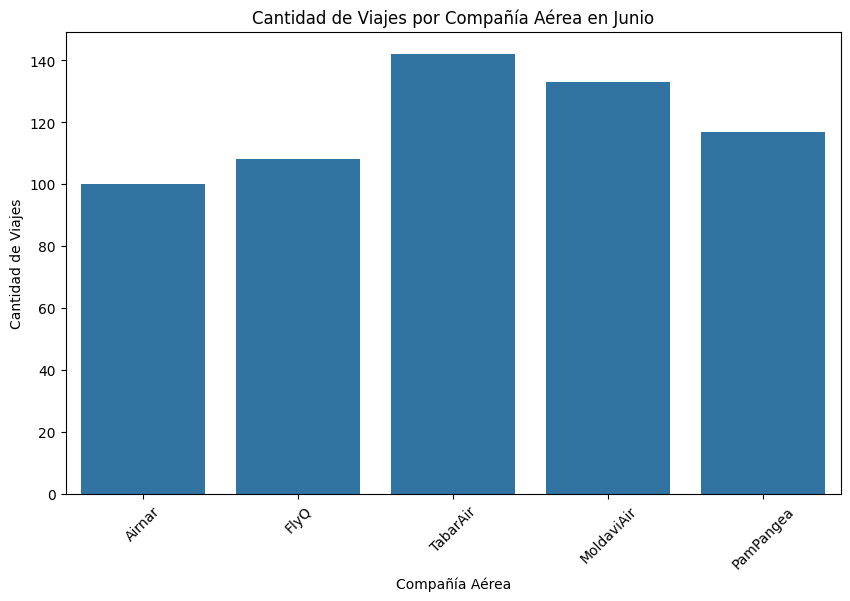

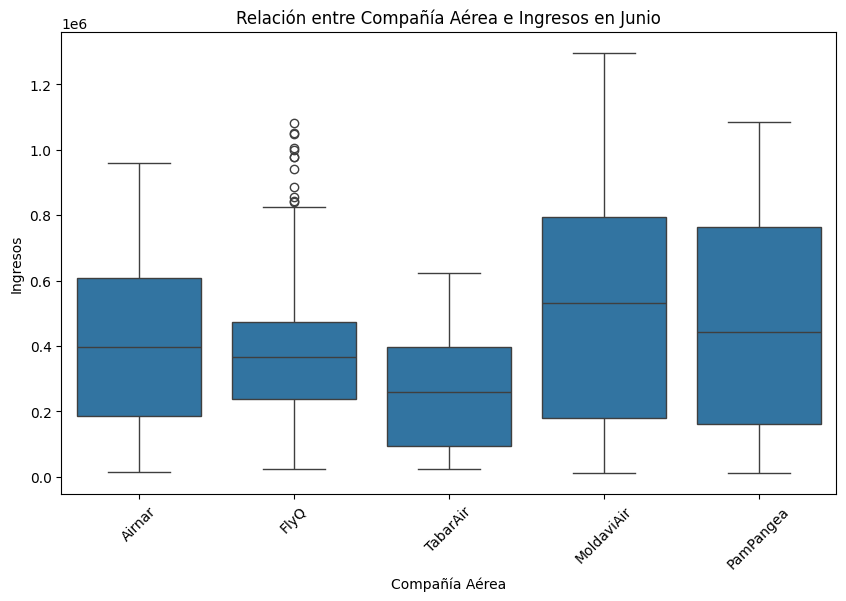

In [40]:
# Mostrar la cantidad de viajes por compañía aérea
viajes_por_compania = df_air_jun['aircompany'].value_counts()
print("Viajes por compañía aérea:")
print(viajes_por_compania)

# Visualización de la cantidad de viajes por compañía aérea
plt.figure(figsize=(10, 6))
sns.countplot(data=df_air_jun, x='aircompany')
plt.xlabel('Compañía Aérea')
plt.ylabel('Cantidad de Viajes')
plt.title('Cantidad de Viajes por Compañía Aérea en Junio')
plt.xticks(rotation=45)
plt.show()

# Análisis bivariante entre Aircompany e Ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_air_jun, x='aircompany', y='ingresos')
plt.xlabel('Compañía Aérea')
plt.ylabel('Ingresos')
plt.title('Relación entre Compañía Aérea e Ingresos en Junio')
plt.xticks(rotation=45)
plt.show()


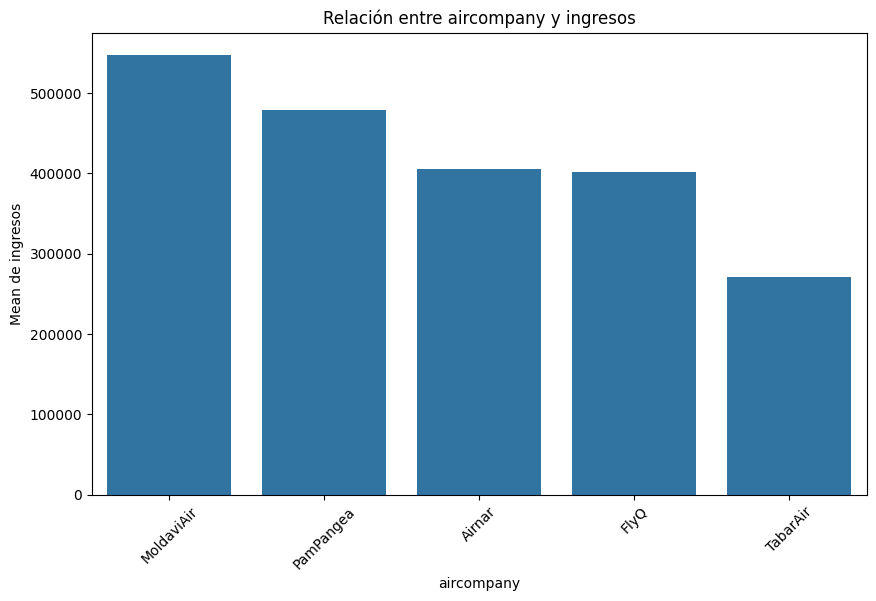

In [41]:
plot_categorical_numerical_relationship(df_air_jun,"aircompany", "ingresos")

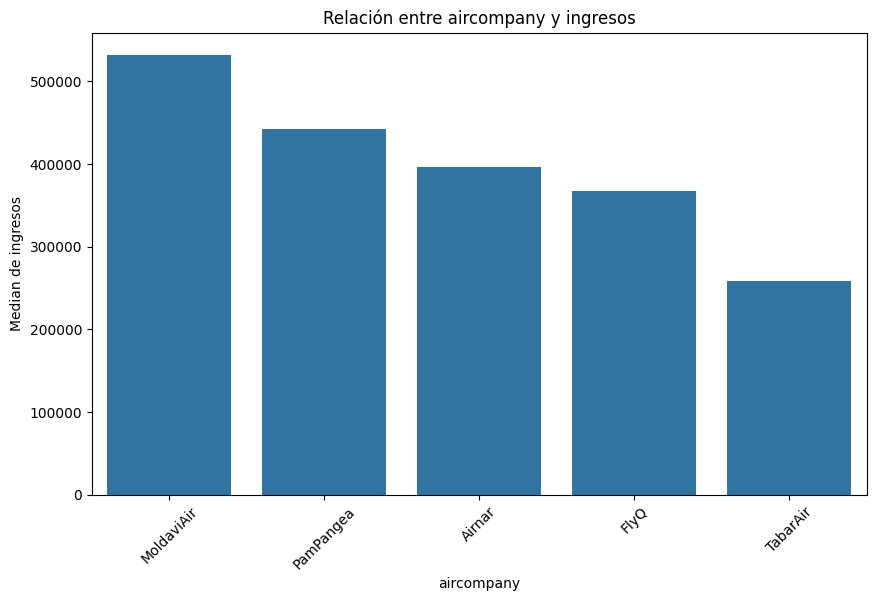

In [42]:
plot_categorical_numerical_relationship(df_air_jun,"aircompany", "ingresos", measure='median')

Vemos que la compañia que más vuela es la de menos ingresos.Paradoja.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

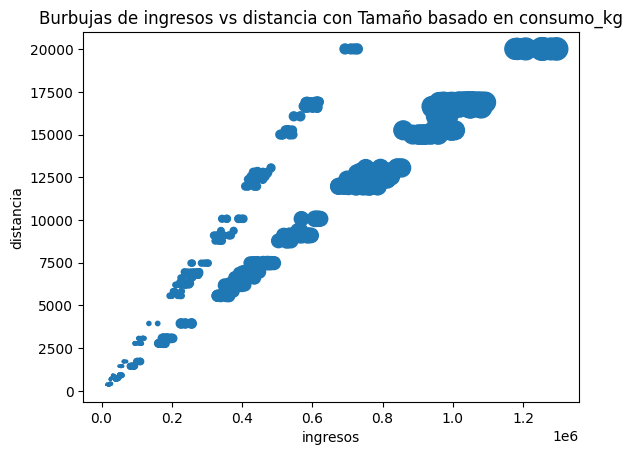

In [43]:
bubble_plot(df_air_jun,"ingresos","distancia","consumo_kg")

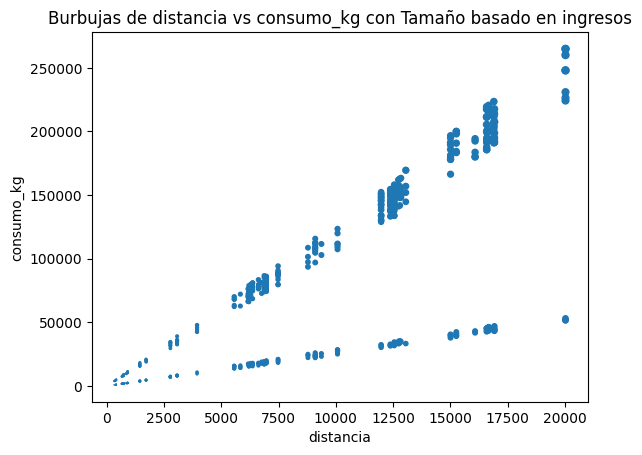

In [44]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos",scale = 50000)

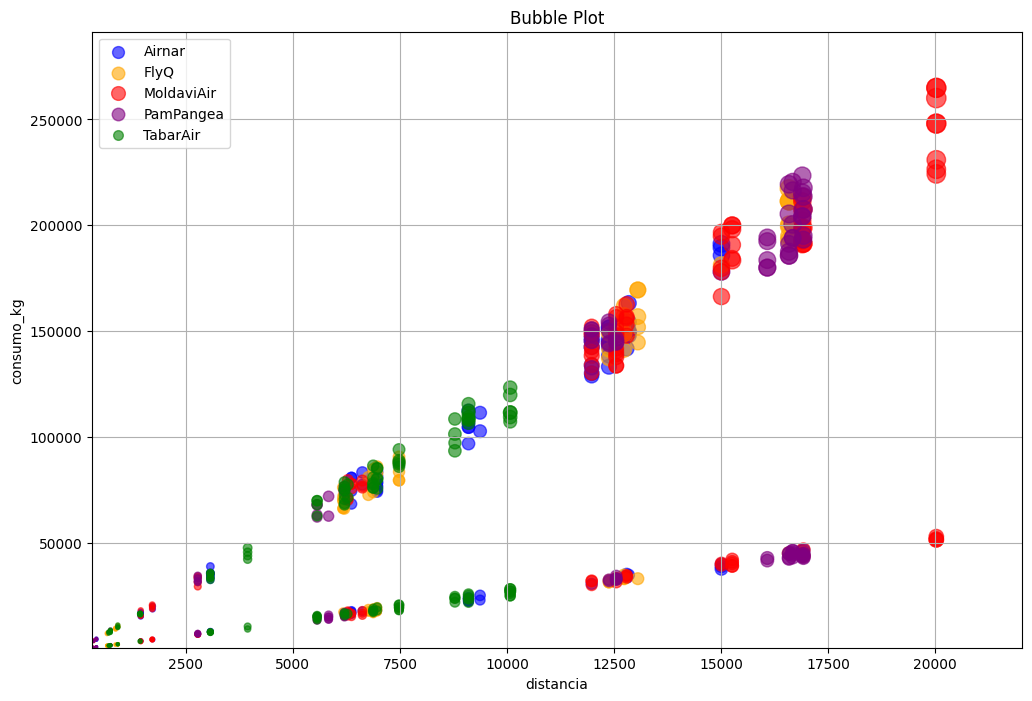

In [45]:
import matplotlib.pyplot as plt

def bubble_plot(df, x, y, z, scale):
    plt.figure(figsize=(12, 8))
    
    # Definir colores únicos para cada compañía aérea
    colors = {'Airnar': 'blue', 'FlyQ': 'orange', 'TabarAir': 'green', 'MoldaviAir': 'red', 'PamPangea': 'purple'}
    
    for company, data in df.groupby('aircompany'):
        plt.scatter(data[x], data[y], s=data[z]*scale, alpha=0.6, label=company, color=colors[company])

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Bubble Plot')
    plt.legend()
    plt.grid(True)
    
    # Establecer límites de los ejes x e y
    plt.xlim(df[x].min() * 0.9, df[x].max() * 1.1)
    plt.ylim(df[y].min() * 0.9, df[y].max() * 1.1)
    
    plt.show()

# Llamar a la función bubble_plot con los datos y las columnas específicas
bubble_plot(df_air_jun, "distancia", "consumo_kg", "ingresos", scale=0.00015)



In [46]:
destinos_unicos = df_air_jun['destino'].unique()
print(destinos_unicos)



['Ginebra' 'Roma' 'Los Angeles' 'Cincinnati' 'Melbourne' 'Londres' 'Bali'
 'Cádiz' 'París' 'Nueva York' 'Barcelona']


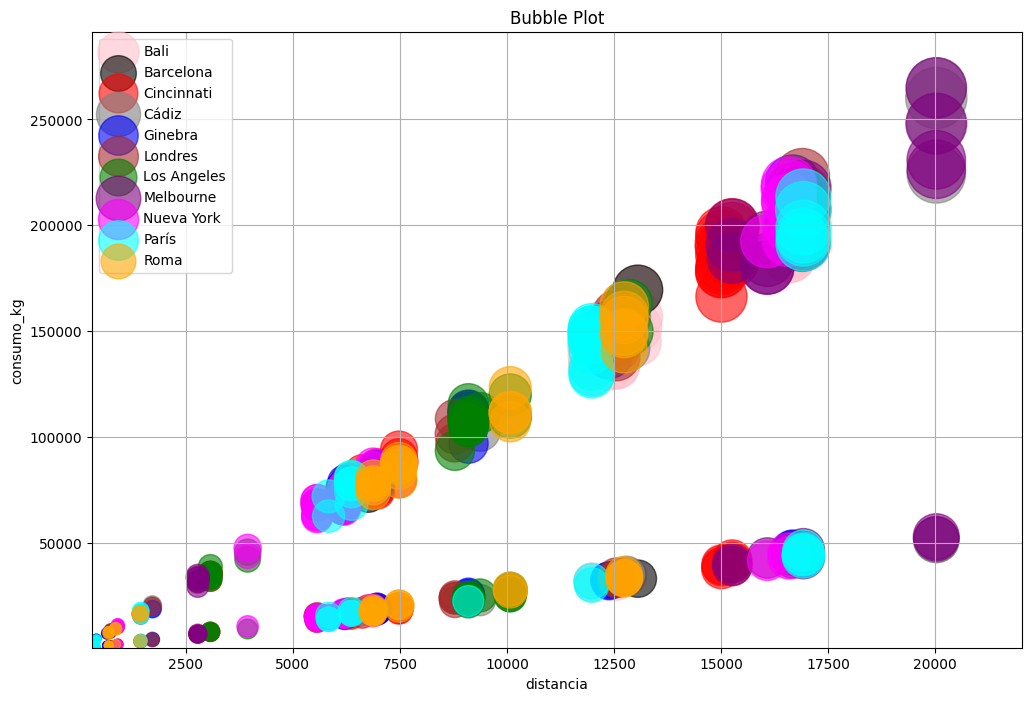

In [47]:
#Probamos con destino
def bubble_plot(df, x, y, z, scale):
    plt.figure(figsize=(12, 8))
    
    # Definir colores únicos para cada destino
    colors = {'Ginebra': 'blue', 'Roma': 'orange', 'Los Angeles': 'green', 'Cincinnati': 'red', 'Melbourne': 'purple',
              'Londres': 'brown', 'Bali': 'pink', 'Cádiz': 'gray', 'París': 'cyan', 'Nueva York': 'magenta',
              'Barcelona': 'black'}
    
    for dest, data in df.groupby('destino'):
        plt.scatter(data[x], data[y], s=data[z]*scale, alpha=0.6, label=dest, color=colors[dest])

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Bubble Plot')
    plt.legend()
    plt.grid(True)
    
    # Establecer límites de los ejes x e y
    plt.xlim(df[x].min() * 0.9, df[x].max() * 1.1)
    plt.ylim(df[y].min() * 0.9, df[y].max() * 1.1)
    
    plt.show()

# Llamar a la función bubble_plot con los datos y las columnas específicas
bubble_plot(df_air_jun, "distancia", "consumo_kg", "ingresos", scale=0.0015)


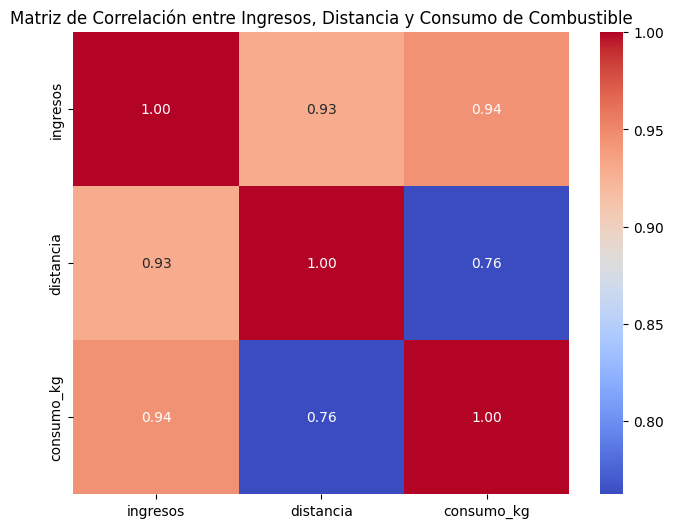

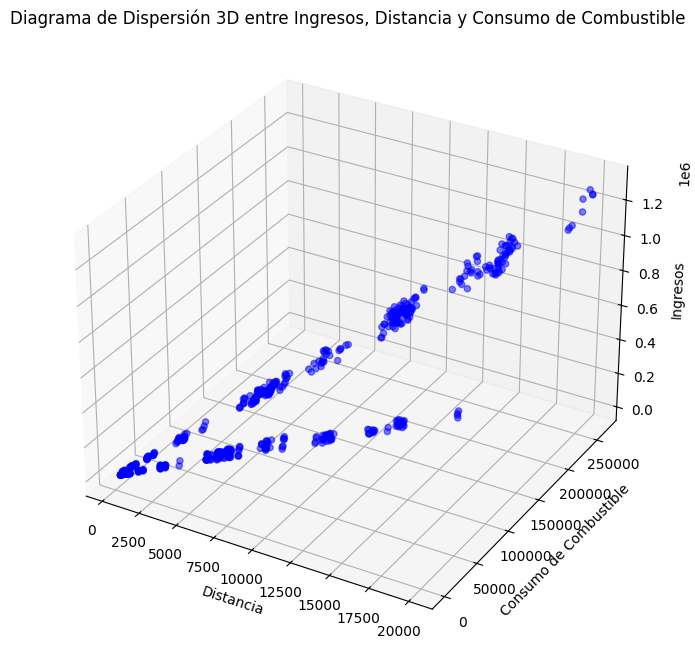

                            OLS Regression Results                            
Dep. Variable:               ingresos   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.743e+04
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:15:58   Log-Likelihood:                -6748.3
No. Observations:                 600   AIC:                         1.350e+04
Df Residuals:                     597   BIC:                         1.352e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6272.4358   1345.480      4.662      0.0

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
correlation_matrix = df_air_jun[['ingresos', 'distancia', 'consumo_kg']].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Ingresos, Distancia y Consumo de Combustible')
plt.show()

# Diagrama de dispersión 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_air_jun['distancia'], df_air_jun['consumo_kg'], df_air_jun['ingresos'], c='blue', marker='o', alpha=0.5)
ax.set_xlabel('Distancia')
ax.set_ylabel('Consumo de Combustible')
ax.set_zlabel('Ingresos')
plt.title('Diagrama de Dispersión 3D entre Ingresos, Distancia y Consumo de Combustible')
plt.show()

# Análisis de regresión múltiple
import statsmodels.api as sm

X = df_air_jun[['distancia', 'consumo_kg']]
y = df_air_jun['ingresos']

X = sm.add_constant(X)  # Agregar término constante
model = sm.OLS(y, X).fit()
print(model.summary())


### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [49]:
# Paso 1: Observar la distribución de los valores de "distancia"
print(df_air_jun['distancia'].describe())




count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64


In [50]:
# Paso 2: Definir los rangos de las categorías y asignar etiquetas
bins = [0, 500, 1000, 1500, 2000]  # Definir los rangos de las categorías
labels = ['Corto', 'Medio', 'Largo', 'Muy Largo']  # Asignar etiquetas a cada categoría

# Paso 3: Crear la variable categórica "cat_vuelo"
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=labels)

# Mostrar los primeros registros del DataFrame con la nueva variable categórica. Vemos que algo no ha ido bien en la conversión
df_air_jun.head(20)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corto
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,NaN
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,NaN
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,NaN
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,NaN
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23,NaN
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23,Corto
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23,NaN
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737,Jun23,NaN
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23,Muy Largo


In [51]:
# Alternativa. Calcular los cuartiles de la columna "distancia"
quartiles = df_air_jun['distancia'].quantile([0, 0.25, 0.5, 0.75, 1]).values

# Definir los bins basados en los cuartiles
bins = [0] + list(quartiles[1:-1]) + [df_air_jun['distancia'].max()]

# Definir las etiquetas de las categorías
labels = ['Corto', 'Medio', 'Largo', 'Muy Largo']

# Crear la variable categórica "cat_vuelo" utilizando pd.cut
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=labels, include_lowest=True)

# Mostrar los primeros registros para verificar. Esta vez sí funciona
df_air_jun.head(20)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corto
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Muy Largo
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Largo
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,Medio
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,Largo
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23,Muy Largo
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23,Corto
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23,Muy Largo
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737,Jun23,Muy Largo
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23,Corto


In [52]:
import pandas as pd

# Observamos la distribución de los valores de "distancia" para definir los rangos de las categorías
print(df_air_jun['distancia'].describe())

# Definimos los rangos de las categorías y las etiquetas
bins = [0, 500, 2000, 5000, df_air_jun['distancia'].max()]
labels = ['Corto', 'Medio', 'Largo', 'Muy Largo']

# Creamos la variable categórica "cat_vuelo" utilizando pd.cut() para dividir las distancias en los rangos definidos
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=labels, include_lowest=True)

# Visualizamos los primeros registros para verificar que la variable "cat_vuelo" se ha creado correctamente
df_air_jun.head(20)




count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corto
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Muy Largo
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Muy Largo
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,Muy Largo
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,Muy Largo
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23,Muy Largo
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23,Corto
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23,Muy Largo
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737,Jun23,Muy Largo
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23,Medio


In [53]:
# Calcular el ingreso por kilogramo consumido (ingreso_por_kg)
df_air_jun['ingreso_por_kg'] = df_air_jun['ingresos'] / df_air_jun['consumo_kg']

# Calcular el kilogramo consumido por kilómetro (kg_por_km)
df_air_jun['kg_por_km'] = df_air_jun['consumo_kg'] / df_air_jun['distancia']

# Mostrar las primeras filas del DataFrame con las nuevas variables
print(df_air_jun[['ingreso_por_kg', 'kg_por_km']].head())


   ingreso_por_kg  kg_por_km
0       13.835678   2.502900
1       13.994604   2.628288
2        5.343473  12.022400
3       13.704256   2.673000
4        5.092391  11.512800


In [54]:
# Seleccionar las columnas relevantes y mostrar las primeras filas del DataFrame
print(df_air_jun[['aircompany', 'ingreso_por_kg', 'kg_por_km']].head())



   aircompany  ingreso_por_kg  kg_por_km
0      Airnar       13.835678   2.502900
1        FlyQ       13.994604   2.628288
2    TabarAir        5.343473  12.022400
3  MoldaviAir       13.704256   2.673000
4    TabarAir        5.092391  11.512800


In [55]:
# Calcular las medias de ingreso_por_kg y kg_por_km por aircompany
medias_por_aircompany = df_air_jun.groupby('aircompany')[['ingreso_por_kg', 'kg_por_km']].mean()

# Mostrar las medias por aircompany
print("Medias por aircompany:")
print(medias_por_aircompany)
print()

# Calcular las medias de ingreso_por_kg y kg_por_km por la categoría de distancia
medias_por_distancia = df_air_jun.groupby('cat_vuelo')[['ingreso_por_kg', 'kg_por_km']].mean()

# Mostrar las medias por la categoría de distancia
print("Medias por categoría de distancia:")
print(medias_por_distancia)


Medias por aircompany:
            ingreso_por_kg  kg_por_km
aircompany                           
Airnar            8.156545   8.663475
FlyQ              8.994360   7.856310
MoldaviAir        8.511334   8.275766
PamPangea         9.463550   7.406889
TabarAir          9.271974   7.596773

Medias por categoría de distancia:
           ingreso_por_kg  kg_por_km
cat_vuelo                           
Corto           10.104313   6.821044
Medio            9.698591   7.192755
Largo            9.204561   7.620975
Muy Largo        8.600676   8.222333


C:\Users\ferna\AppData\Local\Temp\ipykernel_4856\944486391.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias_por_distancia = df_air_jun.groupby('cat_vuelo')[['ingreso_por_kg', 'kg_por_km']].mean()


In [56]:
# Calcular las medias de ingreso_por_kg y kg_por_km por aircompany y cat_vuelo
medias_por_combinacion = df_air_jun.groupby(['aircompany', 'cat_vuelo'])[['ingreso_por_kg', 'kg_por_km']].mean()

# Mostrar las medias por cada combinación de aircompany y cat_vuelo
print("Medias por combinación de aircompany y cat_vuelo:")
print(medias_por_combinacion)


Medias por combinación de aircompany y cat_vuelo:
                      ingreso_por_kg  kg_por_km
aircompany cat_vuelo                           
Airnar     Corto            9.830515   7.064463
           Medio            7.909963   9.080445
           Largo            7.379044   9.291892
           Muy Largo        8.136990   8.673104
FlyQ       Corto                 NaN        NaN
           Medio           10.613875   6.326633
           Largo                 NaN        NaN
           Muy Largo        8.531642   8.293361
MoldaviAir Corto            9.182020   7.600722
           Medio           10.363777   6.576375
           Largo           10.222880   6.587889
           Muy Largo        7.995383   8.765226
PamPangea  Corto           10.803715   6.223413
           Medio           11.168436   5.727689
           Largo           10.532558   6.747322
           Muy Largo        8.927032   7.868806
TabarAir   Corto                 NaN        NaN
           Medio            8.971828  

C:\Users\ferna\AppData\Local\Temp\ipykernel_4856\465758948.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias_por_combinacion = df_air_jun.groupby(['aircompany', 'cat_vuelo'])[['ingreso_por_kg', 'kg_por_km']].mean()


In [57]:
# Filtrar los datos para incluir solo las observaciones de TabarAir
tabarair_data = df_air_jun[df_air_jun['aircompany'] == 'TabarAir']

# Calcular las medias de ingreso_por_kg y kg_por_km para cada categoría de vuelo
tabarair_medias_por_cat = tabarair_data.groupby('cat_vuelo')[['ingreso_por_kg', 'kg_por_km']].mean()

# Identificar la categoría de vuelo más eficiente para TabarAir
cat_eficiente = tabarair_medias_por_cat.idxmax()

print("Categoría de vuelo más eficiente para TabarAir:")
print(cat_eficiente)


Categoría de vuelo más eficiente para TabarAir:
ingreso_por_kg    Muy Largo
kg_por_km             Medio
dtype: category
Categories (4, object): ['Corto' < 'Medio' < 'Largo' < 'Muy Largo']


C:\Users\ferna\AppData\Local\Temp\ipykernel_4856\1434416937.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabarair_medias_por_cat = tabarair_data.groupby('cat_vuelo')[['ingreso_por_kg', 'kg_por_km']].mean()


Según los datos, la categoría de vuelo más eficiente para TabarAir es "Muy Largo" en términos de ingreso_por_kg, mientras que para kg_por_km, la categoría más eficiente es "Medio". En promedio, los vuelos considerados como "Muy Largo" generan más ingresos por kilogramo de combustible consumido, mientras que los vuelos clasificados como "Medio" son más eficientes en términos de consumo de combustible por kilómetro recorrido para TabarAir.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.